### plot bar of FoM for timegaps and footprint

take csv tables as input and polt bar of FOM for grouped by family 

csv files inside folder /data

- df_tgaps_raw_sat.csv
- df_stars_sat.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points


In [3]:
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']


In [4]:
def scale(arr):
    """scale array by max"""
    newarr = arr / arr.max()
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]


### timegaps

In [5]:
df_fom = pd.read_csv('df_tgaps_raw_sat.csv')

In [6]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col]) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.4_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.4_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1) 

In [7]:
df_new.head()

,db,uu,ug,ur,ui,uz,uy,gg,gr,gi,...,ri,rz,ry,ii,iz,iy,zz,zy,yy,family
0,agnddf,0.154577,0.596256,0.405609,0.382953,NaN,NaN,0.093687,0.596975,0.535769,...,0.610864,0.425802,0.224443,0.045960,0.618564,0.550814,0.043287,0.702244,0.189723,agnddf
1,alt_roll_mod2_dust_sdf_0.20,0.093099,0.511571,0.333454,0.399466,NaN,0.000002,0.107676,0.735797,0.911912,...,0.863399,0.880341,0.599935,0.046534,0.840092,0.799630,0.043538,0.861967,0.169228,alt
2,baseline_2snaps,0.133704,0.503766,0.292965,0.266280,NaN,NaN,0.085263,0.515069,0.449874,...,0.514243,0.339958,0.167288,0.041131,0.533988,0.407949,0.028944,0.543162,0.114749,baseline
3,baseline,0.146688,0.571253,0.395299,0.404390,NaN,0.000004,0.118831,0.574887,0.548739,...,0.579204,0.409448,0.192521,0.046224,0.594277,0.510547,0.044319,0.642671,0.129849,baseline
4,bulges_bs,0.120832,0.547091,0.266458,0.228006,NaN,0.000010,0.101434,0.457703,0.396612,...,0.457536,0.325023,0.163228,0.036683,0.464458,0.357357,0.035261,0.474499,0.141572,bulges


(0, 1.01)

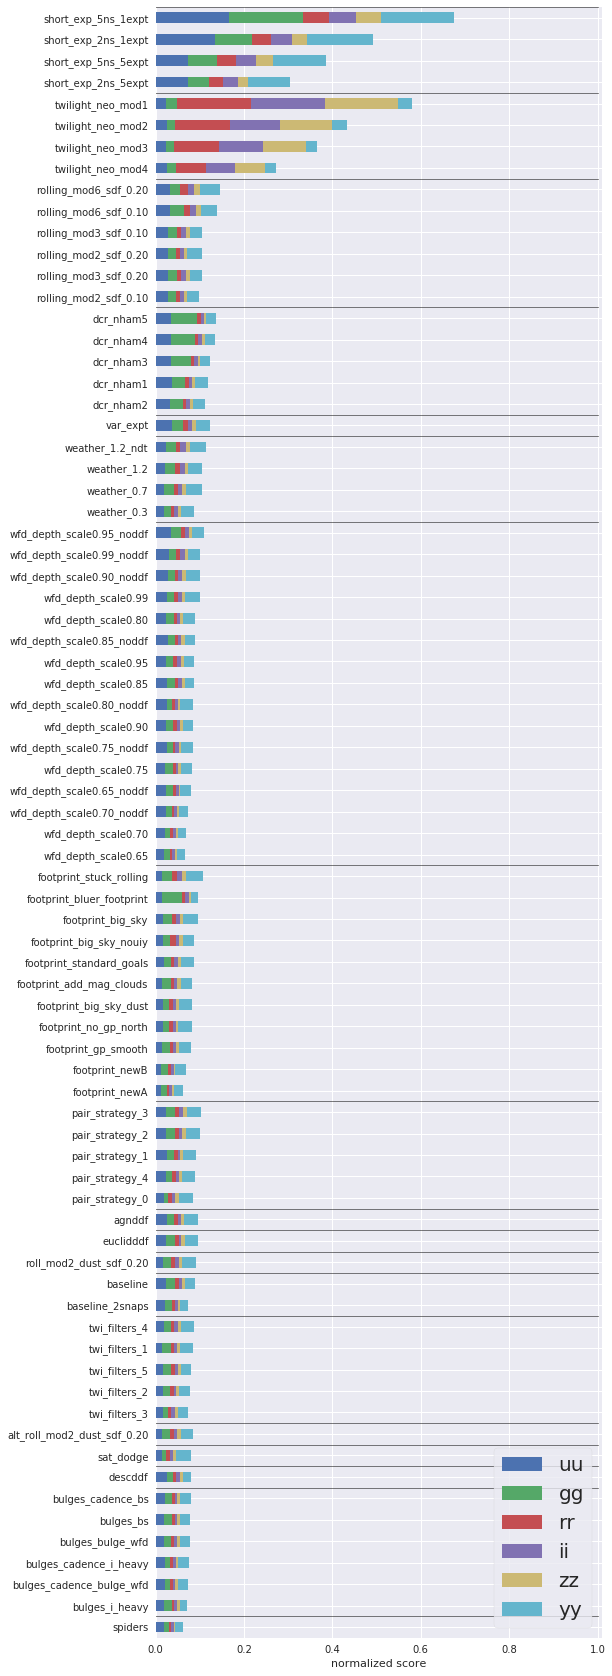

In [8]:
# tgaps FOM for same filter pair
colon = cols_same

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon ], axis=1)

# get the max FOM of each family and sort by this
df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)

df_ = df_.set_index('db')
df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
# df_ = df_.sort_values(by='total', ascending=True)

df_[colon] = df_[colon]/6
ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30))

# get positions of hlines
hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
hlines = [hlines, hlines]
ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5)

plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right', frameon=True)
plt.xlim([0,1.01])


(0, 1.01)

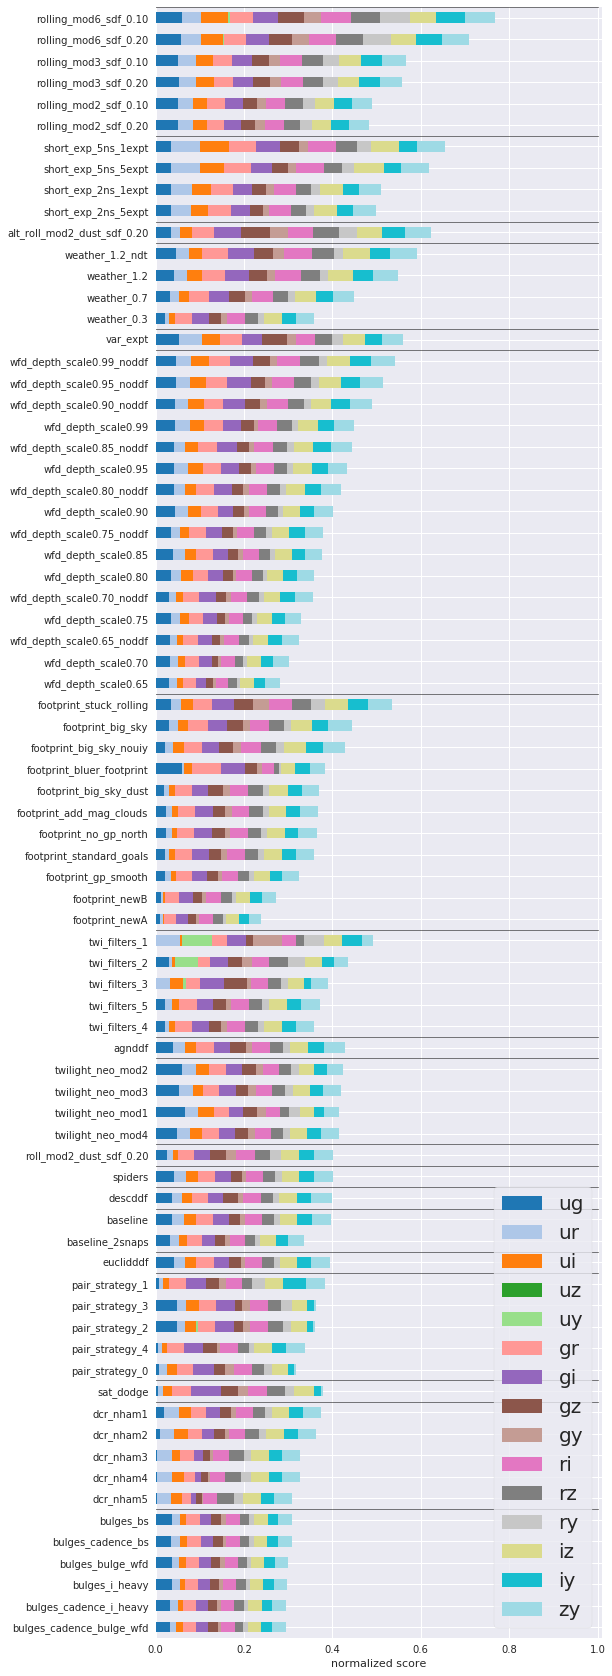

In [9]:
# tgaps FOM for same filter pair

colon = cols_diff

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon ], axis=1)

df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)

df_ = df_.set_index('db')
df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
# df_ = df_.sort_values(by='total', ascending=True)

df_[colon] = df_[colon]/15
ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), colormap=plt.cm.tab20)

# get positions of hlines
hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
hlines = [hlines, hlines]
ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5,)

plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right', frameon=True)
plt.xlim([0,1.01])


### footprint

In [10]:
df_stars = pd.read_csv('df_stars_sat.csv')

In [11]:
df_new = df_stars.copy()
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.4_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.4_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1) 

for col in df_new.columns:
    if col not in ['family', 'db']:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
        df_new[col] = scale(df_new[col]) 


In [12]:
df_new.head()

,db,uu_field,uu_star,ug_field,ug_star,ur_field,ur_star,ui_field,ui_star,uz_field,...,iz_star,iy_field,iy_star,zz_field,zz_star,zy_field,zy_star,yy_field,yy_star,family
0,agnddf,0.717262,0.679456,0.637694,0.616561,0.589530,0.497075,0.683946,0.497571,0.707192,...,0.709095,0.683359,0.672847,0.877141,0.755476,0.715356,0.700753,0.841282,0.740212,agnddf
1,alt_roll_mod2_dust_sdf_0.20,0.301339,0.335478,0.098967,0.111979,0.042489,0.035533,0.100334,0.104617,0.190068,...,0.215312,0.097072,0.095945,0.095309,0.110761,0.107116,0.097869,0.204918,0.237825,alt
2,baseline_2snaps,0.363839,0.372733,0.576592,0.390597,0.449165,0.315484,0.550167,0.492909,0.694349,...,0.289832,0.336672,0.362310,0.079672,0.131106,0.293633,0.338280,0.140089,0.148445,baseline
3,baseline,0.605655,0.608687,0.643718,0.469186,0.572079,0.414257,0.644649,0.583540,0.694349,...,0.605464,0.564715,0.554361,0.585257,0.581166,0.559551,0.536237,0.568554,0.538782,baseline
4,bulges_bs,0.305060,0.180172,0.560241,0.329210,0.379363,0.197958,0.446488,0.255555,0.505993,...,0.134834,0.233436,0.208063,0.011914,0.011881,0.235955,0.212929,0.057377,0.044454,bulges


(0, 1.01)

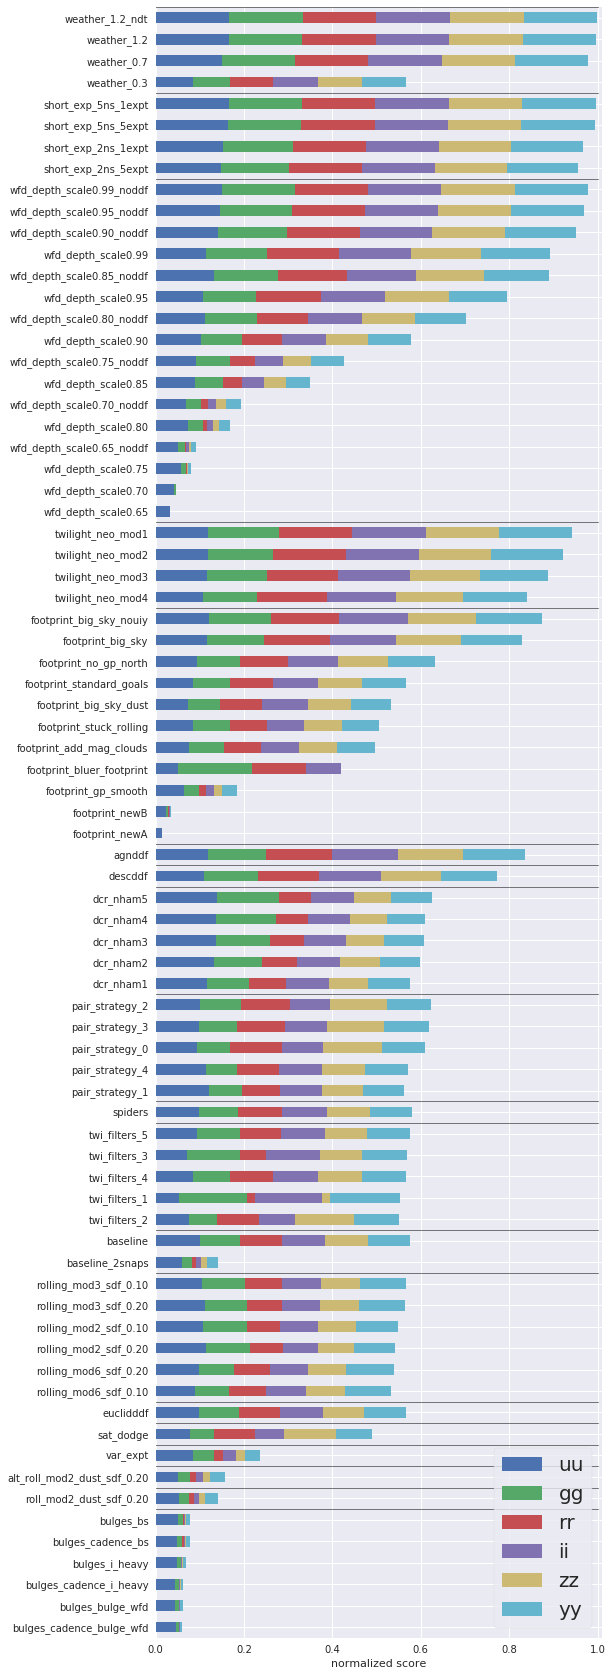

In [13]:
# number of field same filter
colon = cols_same

colon_ = ['{}_field'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)

df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)

df_ = df_.set_index('db')
df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])

df_[ colon ] = df_[ colon_ ]/6

#renamecol = {'{}_field'.format(i):'{}'.format(i) for i in colon} 
#df_.rename(columns=renamecol)   

ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30))
# get positions of hlines
hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
hlines = [hlines, hlines]
ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5,)

plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right', frameon=True)
plt.xlim([0,1.01])


(0, 1.01)

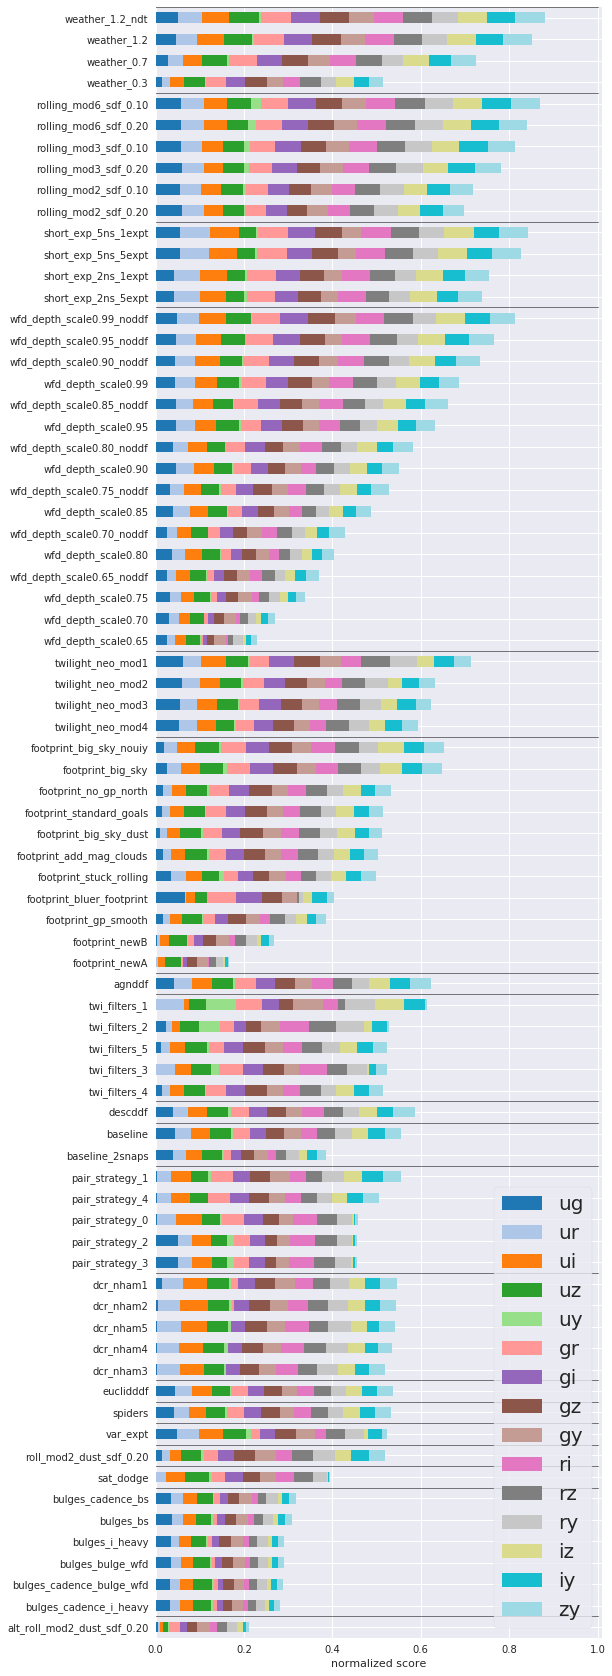

In [14]:
# number of field same filter
colon = cols_diff

colon_ = ['{}_field'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)

df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)

df_ = df_.set_index('db')
df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])

df_[ colon ] = df_[ colon_ ]/15

#renamecol = {'{}_field'.format(i):'{}'.format(i) for i in colon} 
#df_.rename(columns=renamecol)   

ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), colormap=plt.cm.tab20)
# get positions of hlines
hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
hlines = [hlines, hlines]
ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5,)

plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right', frameon=True)
plt.xlim([0,1.01])


(0, 1.01)

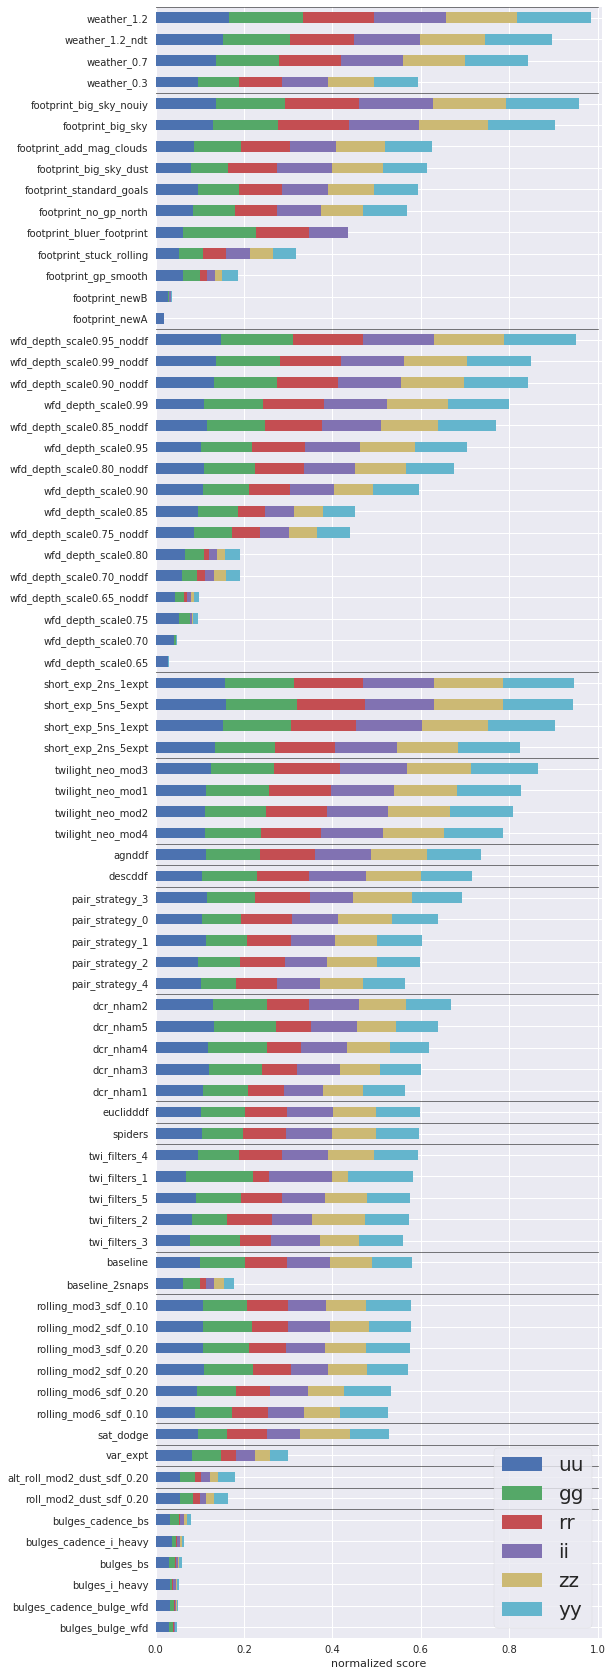

In [15]:
# number of stars same filter
colon = cols_same

colon_ = ['{}_star'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)

df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)

df_ = df_.set_index('db')
df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])

df_[ colon ] = df_[ colon_ ]/6

#renamecol = {'{}_field'.format(i):'{}'.format(i) for i in colon} 
#df_.rename(columns=renamecol)   

ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30))
# get positions of hlines
hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
hlines = [hlines, hlines]
ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5,)

plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right', frameon=True)
plt.xlim([0,1.01])


(0, 1.01)

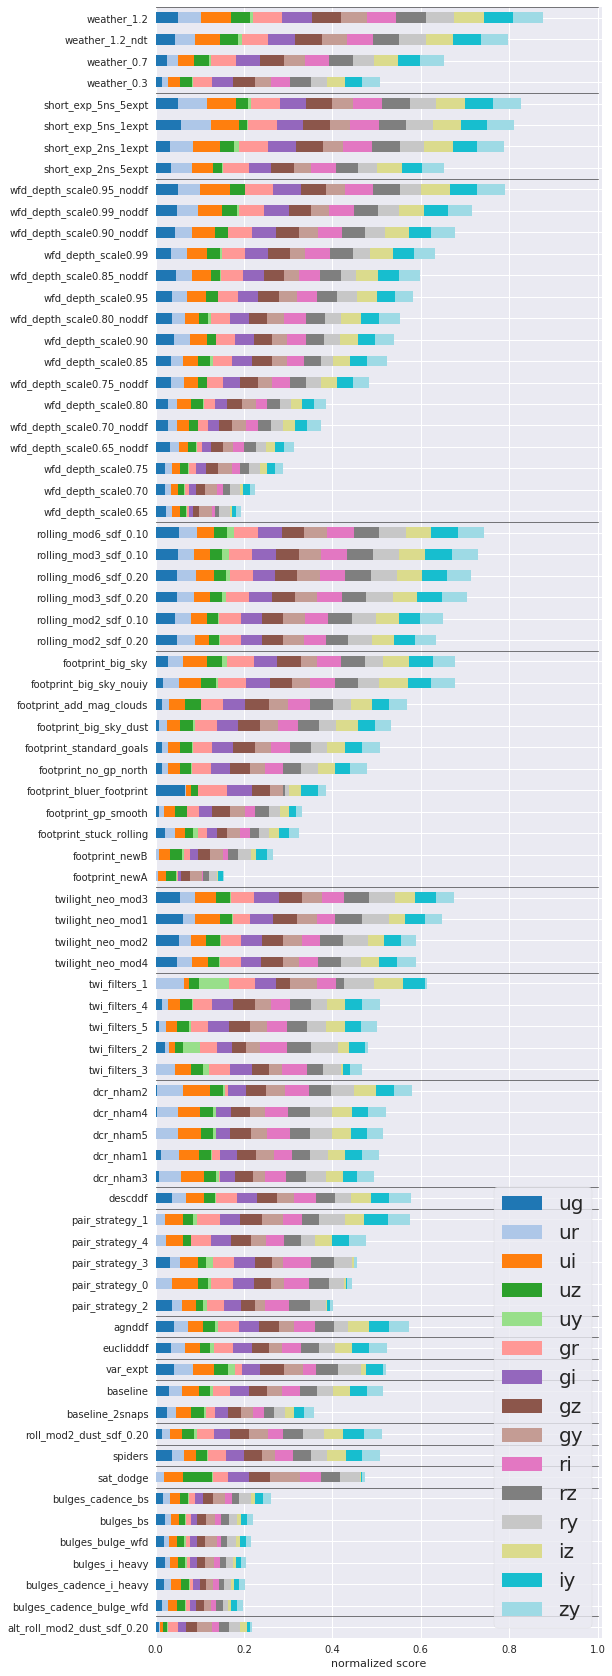

In [49]:
# number of stars different filter
colon = cols_diff

colon_ = ['{}_star'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)

df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)

df_ = df_.set_index('db')
df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])

df_[ colon ] = df_[ colon_ ]/15

#renamecol = {'{}_field'.format(i):'{}'.format(i) for i in colon} 
#df_.rename(columns=renamecol)   

ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), colormap=plt.cm.tab20)

# get positions of hlines
hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
hlines = [hlines, hlines]
ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5,)

plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right', frameon=True)
plt.xlim([0,1.01])


#### others

Text(0, 0.5, '')

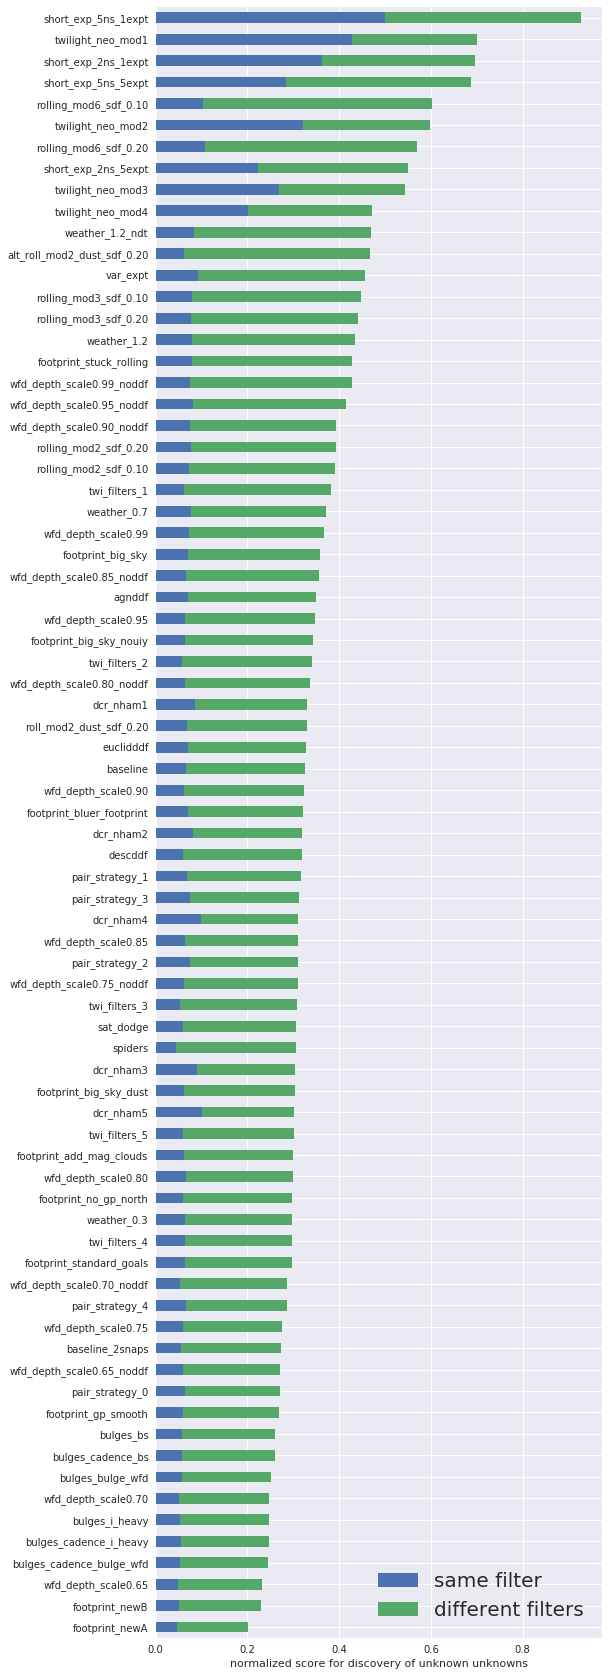

In [69]:
# plot only same / different filter
'''
df_new['same filter'] = scale( np.sum(df_new[ cols_same ], axis=1) ) /2
df_new['different filters'] = scale( np.sum(df_new[ cols_diff ], axis=1) )/2
df_new['total'] = np.sum(df_new[['same filter', 'different filters'] ], axis=1)

df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.4_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.4_10yrs.db", "") )

df_ = df_new.sort_values(by='total', ascending=True).set_index('db')

df_[ ['same filter','different filters'] ].plot.barh(stacked=True, figsize=(8, 30))

plt.xlabel('normalized score for discovery of unknown unknowns')
plt.ylabel('')
'''

```python
df_['same filter'] = scale( np.sum(df_[cols_same], axis=1))/2 
df_['different filters'] = scale( np.sum(df_[cols_diff], axis=1) ) /2
df_['total'] = np.sum(df_[['same filter', 'different filters']], axis=1)
```

```python
df_ = df_.sort_values(by='total', ascending=True)
df_[['same filter', 'different filters']].plot.barh(stacked=True, figsize=(8,30))
plt.xlabel('normalized score for discovery of unknown unknowns')
plt.ylabel('')
plt.xlim([0, 1.025])
```

In [7]:
# df_new.to_csv('df_tgaps_sat.csv', index=False)
# plt.hist(df_new['different filters'], bins=100);
# plt.hist(df_new['same filter'], bins=100);

In [198]:
#df_['total_logn'] = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )


#dist_1 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )


#dist_2 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )


```
# assume score from a log normal distribution

df_new['same filter'] = scale( np.sum(df_new[ cols_same ], axis=1) ) /2
df_new['different filters'] = scale( np.sum(df_new[ cols_diff ], axis=1) )/2

df_ = df_new.set_index('db')

dist_1 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )
dist_2 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )

df_ = df_.sort_values(by='different filters', ascending=True)
df_['different filters'] = dist_1

df_ = df_.sort_values(by='same filter', ascending=True)
df_['same filter'] = dist_2

df_['total'] = np.sum(df_[['same filter', 'different filters'] ], axis=1)

df_ = df_.sort_values(by='total', ascending=True)
df_[ ['same filter','different filters'] ].plot.barh(stacked=True, figsize=(8, 30))

plt.xlabel('normalized score for discovery of unknown unknowns')
plt.ylabel('')
plt.xlim([0, 1.025])
```